<a href="https://colab.research.google.com/github/yuxuan0702/Boston-Crime-/blob/master/area.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import packages 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import seaborn as sns 
import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster


plt.style.use('ggplot')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# import dataset 
df = pd.read_csv('/content/drive/My Drive/Website_notebook/boston_crime.csv')
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,TESTTEST2,423,NaN,ASSAULT - AGGRAVATED,External,,0,2019-10-16 00:00:00,2019,10,Wednesday,0,NaN,RIVERVIEW DR,NaN,NaN,"(0.00000000, 0.00000000)"
1,I92102201,3301,NaN,VERBAL DISPUTE,E13,583,0,2019-12-20 03:08:00,2019,12,Friday,3,NaN,DAY ST,42.325122,-71.107779,"(42.32512200, -71.10777900)"
2,I92097173,3115,NaN,INVESTIGATE PERSON,C11,355,0,2019-10-23 00:00:00,2019,10,Wednesday,0,NaN,GIBSON ST,42.297555,-71.059709,"(42.29755500, -71.05970900)"
3,I92094519,3126,NaN,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,D14,765,0,2019-11-22 07:50:00,2019,11,Friday,7,NaN,BROOKS ST,42.355120,-71.162678,"(42.35512000, -71.16267800)"
4,I92089785,3005,NaN,SICK ASSIST,E13,574,0,2019-11-05 18:00:00,2019,11,Tuesday,18,NaN,WASHINGTON ST,42.309718,-71.104294,"(42.30971800, -71.10429400)"


In [4]:
# clean data 
df.drop(columns=['INCIDENT_NUMBER','SHOOTING'],inplace=True)
df = df[(df.YEAR!=2015) & (df.YEAR !=2020)]
df = df[df['DISTRICT']!='External']
df['OCCURRED_ON_DATE'] = pd.to_datetime(df['OCCURRED_ON_DATE'])
df['OCCURRED_ON_DATE']=df['OCCURRED_ON_DATE'].dt.date
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398013 entries, 1 to 480712
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   OFFENSE_CODE         398013 non-null  int64  
 1   OFFENSE_CODE_GROUP   373242 non-null  object 
 2   OFFENSE_DESCRIPTION  398013 non-null  object 
 3   DISTRICT             395842 non-null  object 
 4   REPORTING_AREA       398013 non-null  object 
 5   OCCURRED_ON_DATE     398013 non-null  object 
 6   YEAR                 398013 non-null  int64  
 7   MONTH                398013 non-null  int64  
 8   DAY_OF_WEEK          398013 non-null  object 
 9   HOUR                 398013 non-null  int64  
 10  UCR_PART             373134 non-null  object 
 11  STREET               384433 non-null  object 
 12  Lat                  372484 non-null  float64
 13  Long                 372484 non-null  float64
 14  Location             398013 non-null  object 
dtypes: float64(2), in

In [0]:
# change district code to district name 
df['DISTRICT'].replace('D14','Brighton',inplace=True)
df['DISTRICT'].replace('C11','Dorchester',inplace=True)
df['DISTRICT'].replace('D4','SouthEnd',inplace=True)
df['DISTRICT'].replace('B3','Mattapan',inplace=True)
df['DISTRICT'].replace('B2','Roxbury',inplace=True)
df['DISTRICT'].replace('C6','SouthBoston',inplace=True)
df['DISTRICT'].replace('A1','Downtown',inplace=True)
df['DISTRICT'].replace('E5','WestRoxbury',inplace=True)
df['DISTRICT'].replace('A7','EastBoston',inplace=True)
df['DISTRICT'].replace('E13','JamaicaPlain',inplace=True)
df['DISTRICT'].replace('E18','HydePark',inplace=True)
df['DISTRICT'].replace('A15','Charlestown',inplace=True)

## Business Area 

In [0]:
# Set Boston lat and long 
latitude = 42.3601
longitude = -71.0589

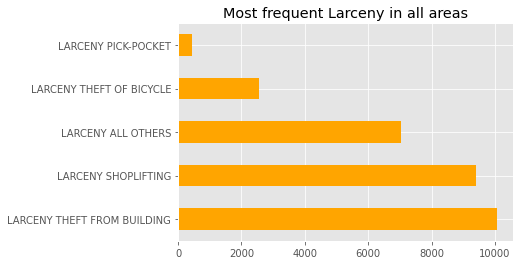

In [7]:
# Most Larceny are shoplifting and theft from building 
df[df.OFFENSE_CODE_GROUP == 'Larceny'].groupby('OFFENSE_DESCRIPTION')['OFFENSE_CODE'].count().sort_values(ascending = False).head(5).plot(kind='barh',color='orange')
plt.ylabel('')
plt.title('Most frequent Larceny in all areas')
plt.show()

In [10]:
pivot_loc = df.pivot_table(values = 'DAY_OF_WEEK',columns='DISTRICT',index='OFFENSE_CODE_GROUP',aggfunc='count')
pivot_loc

DISTRICT,Brighton,Charlestown,Dorchester,Downtown,EastBoston,HydePark,JamaicaPlain,Mattapan,Roxbury,SouthBoston,SouthEnd,WestRoxbury
OFFENSE_CODE_GROUP,,,,,,,,,,,,
Aggravated Assault,362.0,153.0,1224.0,1130.0,350.0,375.0,432.0,1351.0,1968.0,619.0,1020.0,260.0
Aircraft,NaN,NaN,NaN,NaN,54.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Arson,7.0,3.0,9.0,5.0,3.0,2.0,6.0,12.0,25.0,6.0,12.0,8.0
Assembly or Gathering Violations,66.0,6.0,35.0,231.0,13.0,27.0,11.0,30.0,387.0,29.0,50.0,13.0
Auto Theft,294.0,114.0,844.0,384.0,183.0,248.0,293.0,614.0,917.0,484.0,642.0,184.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Towed,1736.0,414.0,1414.0,1496.0,674.0,411.0,993.0,842.0,1188.0,1591.0,2175.0,371.0
Vandalism,1235.0,408.0,2723.0,1367.0,879.0,886.0,937.0,2175.0,2699.0,1315.0,2019.0,732.0
Verbal Disputes,578.0,209.0,3217.0,266.0,572.0,1259.0,701.0,3571.0,3677.0,665.0,825.0,688.0


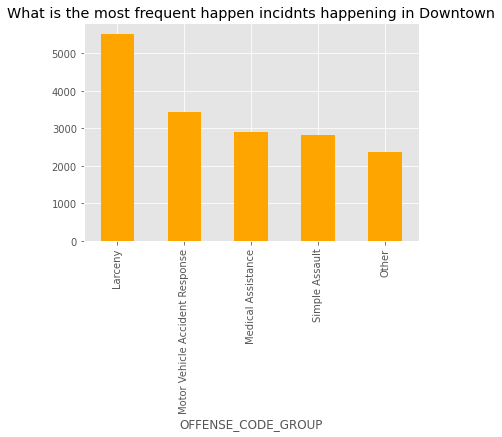

In [12]:
# frequent incidents in downtown 
pivot_loc['Downtown'].sort_values(ascending=False).head(5).plot(kind='bar',color='orange')
plt.title('What is the most frequent happen incidnts happening in Downtown')
plt.show()

In [8]:
# shoplifting 
Larceny_location = df[df.OFFENSE_DESCRIPTION == 'LARCENY SHOPLIFTING'][['Lat','Long']].dropna()

# Create map and display it
bos_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# add incidents to map 
HeatMap(Larceny_location[['Lat','Long']].values.tolist(),radius=10,min_opacity=0.5,blur=10).add_to(bos_map)
bos_map

## Bad Transportation 

In [13]:
# towed distribution 

Towed = df[df['OFFENSE_CODE_GROUP']=='Towed']
Towed = Towed[['Lat','Long']].dropna()
# Create map and display it
bos_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# add incidents to map 
HeatMap(Towed[['Lat','Long']].values.tolist(),radius=10,min_opacity=0.5,blur=10).add_to(bos_map)

bos_map

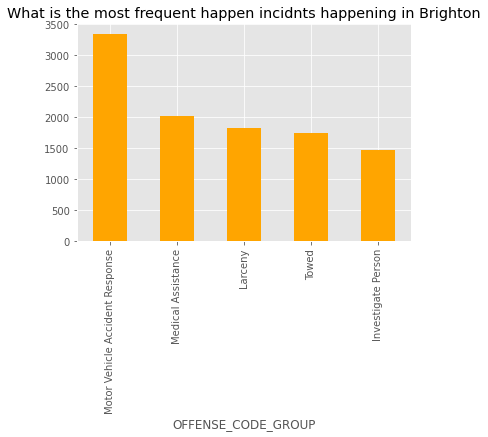

In [14]:
# frequent incidents in brighton
pivot_loc['Brighton'].sort_values(ascending=False).head(5).plot(kind='bar',color='orange')
plt.title('What is the most frequent happen incidnts happening in Brighton')
plt.show()

## Drug Issue Area 

In [15]:
# drug violation location 
drugviolation = df[df['OFFENSE_CODE_GROUP']=='Drug Violation']
drugviolation = drugviolation[['Lat','Long']].dropna()

# Create map and display it
bos_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# add incidents to map 
HeatMap(drugviolation[['Lat','Long']].values.tolist(),radius=10,min_opacity=0.5,blur=10).add_to(bos_map)

bos_map

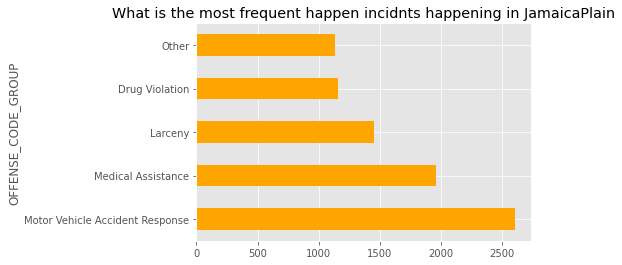

In [17]:
# frequent incidents in JamaicaPlain
pivot_loc['JamaicaPlain'].sort_values(ascending=False).head(5).plot(kind='barh',color='orange')
plt.title('What is the most frequent happen incidnts happening in JamaicaPlain')
plt.show()

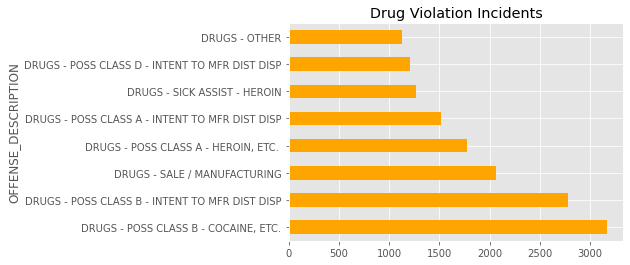

In [18]:
# specific drug violation 
df[df['OFFENSE_CODE_GROUP']=='Drug Violation'].groupby('OFFENSE_DESCRIPTION')['OFFENSE_CODE'].count().sort_values(ascending=False).head(8).plot(kind='barh',color='orange')
plt.title('Drug Violation Incidents')
plt.show()

## Historical Area 

In [19]:
# vandalism 

vandalism_location = df[df.OFFENSE_DESCRIPTION == 'VANDALISM'][['Lat','Long']].dropna()

# Create map and display it
bos_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# add incidents to map 
HeatMap(vandalism_location[['Lat','Long']].values.tolist(),radius=10,min_opacity=0.5,blur=10).add_to(bos_map)
bos_map

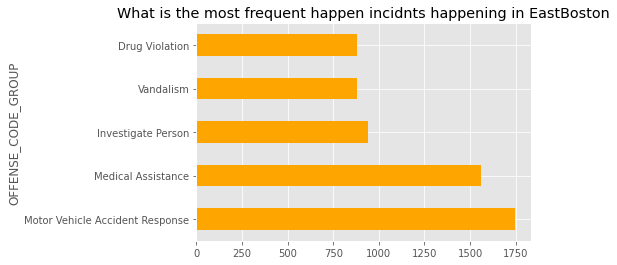

In [20]:
# EastBoston 

pivot_loc['EastBoston'].sort_values(ascending=False).head(5).plot(kind='barh',color='orange')
plt.title('What is the most frequent happen incidnts happening in EastBoston')
plt.show()

## Resident Area 

In [21]:
# verbal disputes 
vd = df[df['OFFENSE_CODE_GROUP']=='Verbal Disputes']
vd = vd[['Lat','Long']].dropna()

# Create map and display it
bos_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# add incidents to map 
HeatMap(vd[['Lat','Long']].values.tolist(),radius=10,min_opacity=0.5,blur=10).add_to(bos_map)

bos_map

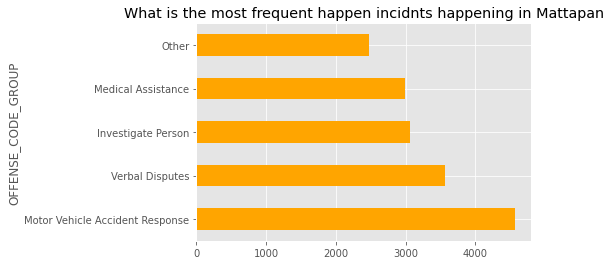

In [22]:
# Mattapan

pivot_loc['Mattapan'].sort_values(ascending=False).head(5).plot(kind='barh',color='orange')
plt.title('What is the most frequent happen incidnts happening in Mattapan')
plt.show()